# Shared Memory

In [1]:
from analyzer_functions import *
shared_path = '~/GPU-research/Preemptions/preemptions/times/shared/shared100.csv'
no_shared_path = '~/GPU-research/Preemptions/preemptions/times/shared/no_shared100.csv'

paths = [no_shared_path, shared_path]

ivls = read_ivls(paths, single=False)

99 99
xticknums: 9
xticklabels: 21


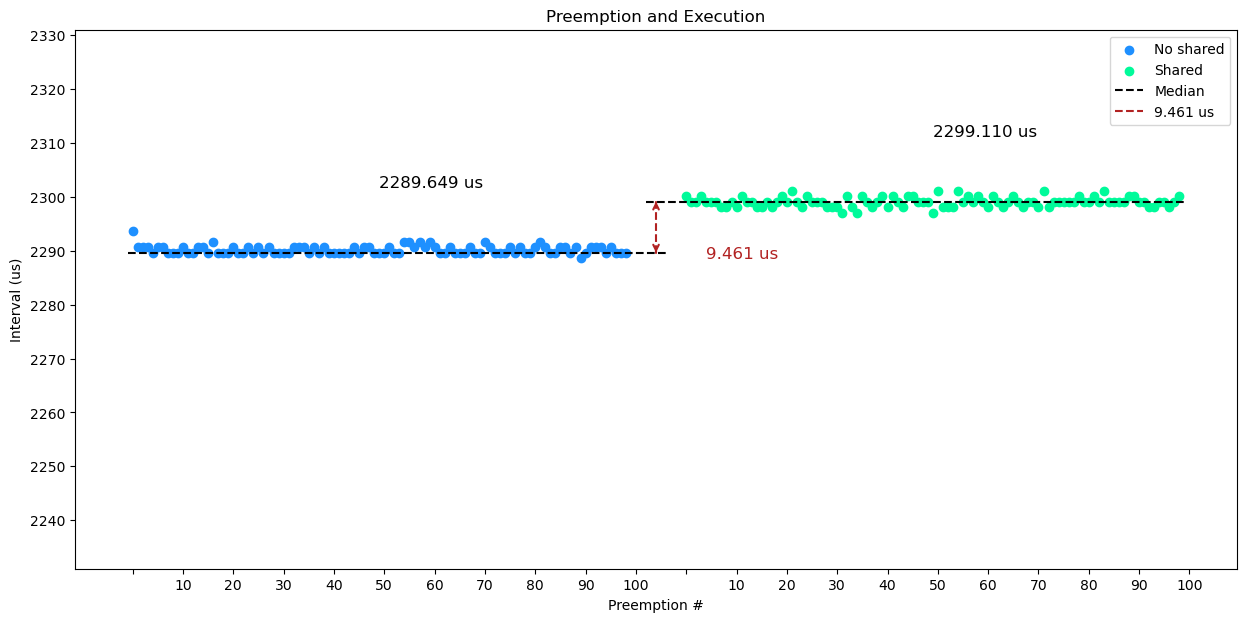

In [2]:
TIMESLICE_LENGTH = 2131
NUM_SAMPES = 100
OFFSET = NUM_SAMPES // 10

plot_side_by_side(noSharedData=ivls[0], sharedData=ivls[1], NUM_SAMPLES=NUM_SAMPES, lowerBound=TIMESLICE_LENGTH + 100, upperBound=TIMESLICE_LENGTH + 200,
                  medianLines=True, offset=OFFSET, firstLabel="No shared", secondLabel="Shared", lowerTextOffset=1, upperTextOffset=10)

198 198
xticknums: 10
xticklabels: 22


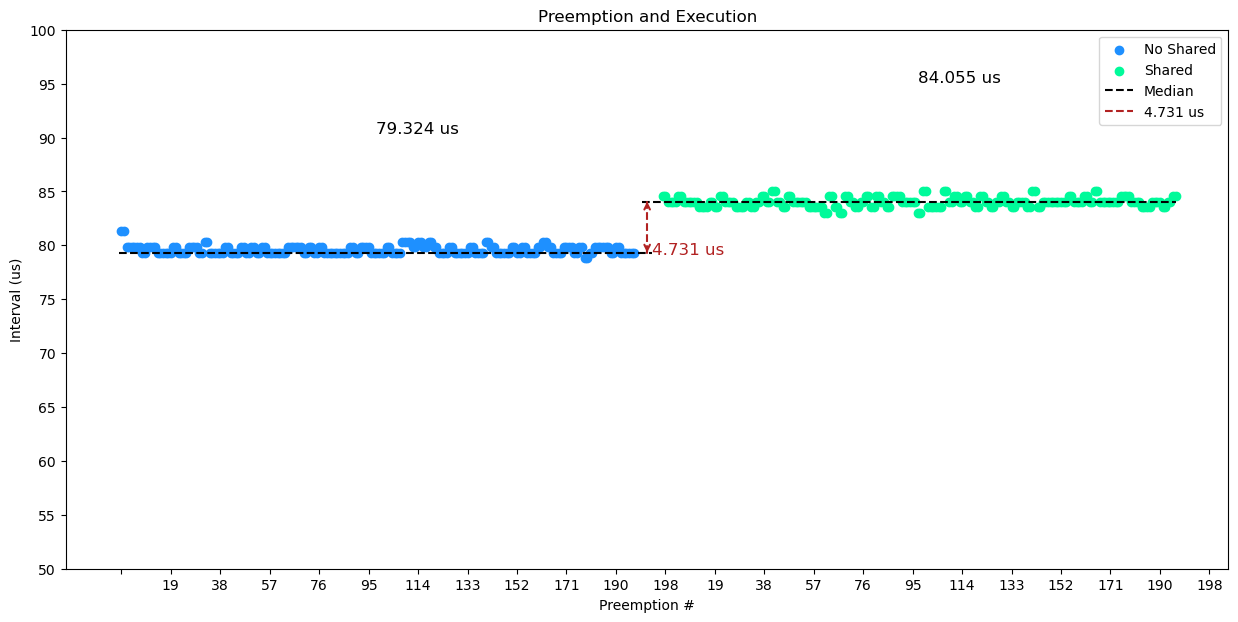

In [4]:
no_shared_oh = get_overhead(ivls[0], timeslice_length=TIMESLICE_LENGTH)
shared_oh = get_overhead(ivls[1], timeslice_length=TIMESLICE_LENGTH)

plot_side_by_side(noSharedData=no_shared_oh, sharedData=shared_oh, NUM_SAMPLES=100*2 - 2, medianLines=True, offset=OFFSET,
                  lowerBound=50, upperBound=100, firstLabel="No Shared", secondLabel="Shared", plotOverhead=True)

30
30 30
xticknums: 9
xticklabels: 21


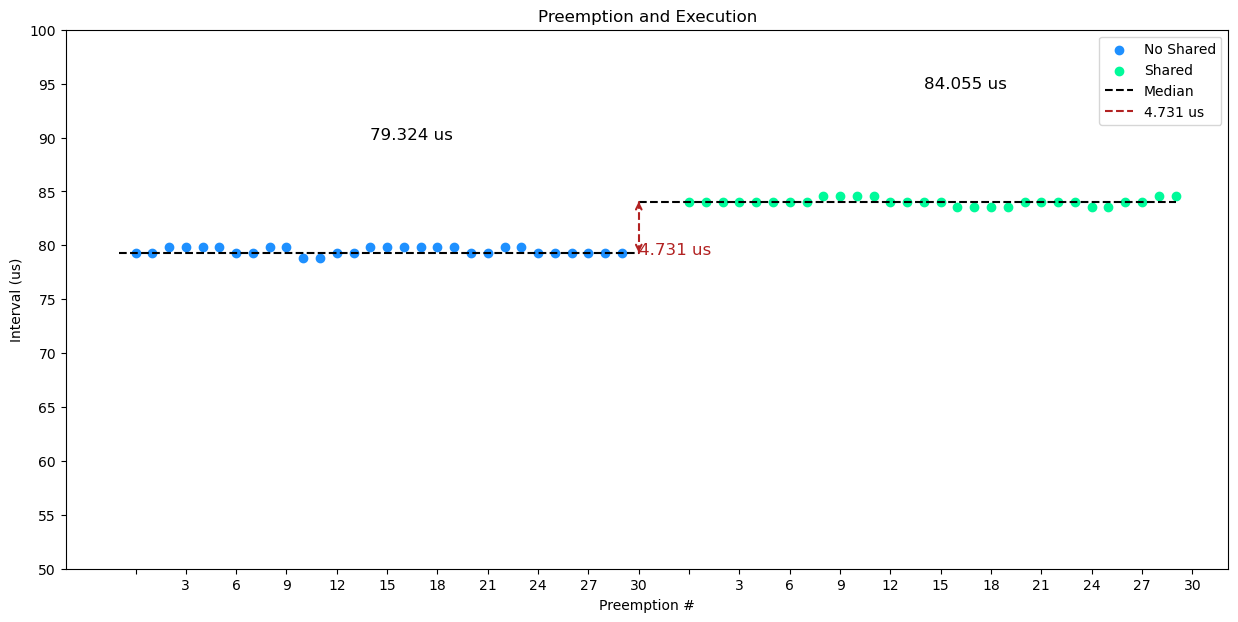

In [15]:
left_ivls = cut_ivls(no_shared_oh, [85, 100])
right_ivls = cut_ivls(shared_oh, [85, 100])
n = len(left_ivls)
print(n)
plot_side_by_side(noSharedData=left_ivls, sharedData=right_ivls, NUM_SAMPLES=n, medianLines=True, offset=n//10,
                 lowerBound=50, upperBound=100, firstLabel="No Shared", secondLabel="Shared", plotOverhead=True)